In [52]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

# Idea to generate a random SNF to compare it to others in the category.
import random

In [53]:
url="https://data.cms.gov/provider-data/api/1/metastore/schemas/dataset/items/4pq5-n9py?show-reference-ids=false"

In [54]:
print(requests.get(url))

<Response [200]>


In [55]:
print(requests.get(url).json())

{'accessLevel': 'public', 'landingPage': 'https://data.cms.gov/provider-data/dataset/4pq5-n9py', 'bureauCode': ['009:38'], 'issued': '2023-08-01', '@type': 'dcat:Dataset', 'modified': '2024-04-01', 'released': '2024-04-24', 'keyword': [{'identifier': 'd03021cc-311c-5181-8eb6-7ccf7e76fc53', 'data': 'General Information'}, {'identifier': '203355e5-2454-505d-b356-08de15938ab9', 'data': 'Address'}, {'identifier': 'c59e48c7-3cc5-5a09-adec-a49493db72f6', 'data': 'Location'}, {'identifier': '70a212e5-bf1b-5cad-9ecd-150dab2bacf9', 'data': 'Ratings'}, {'identifier': '107b8826-e90b-5db3-ac30-ecdb99c73db6', 'data': 'Beds'}, {'identifier': '5692b1a6-1c82-55c4-9698-c7441733b985', 'data': 'Quality'}, {'identifier': 'a6f7b7c6-d26e-5f59-8a5b-c151bacb9907', 'data': 'Staffing'}, {'identifier': '35df7004-e437-5a8a-a96b-1bda5456ccca', 'data': 'Penalties'}], 'contactPoint': {'@type': 'vcard:Contact', 'fn': 'Nursing homes including rehab services', 'hasEmail': 'mailto:BetterCare@cms.hhs.gov'}, 'publisher': 

In [56]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "%modified": "2024-04-12T16:05:17-0400",
    "@type": "dcat:Dataset",
    "accessLevel": "public",
    "bureauCode": [
        "009:38"
    ],
    "contactPoint": {
        "@type": "vcard:Contact",
        "fn": "Nursing homes including rehab services",
        "hasEmail": "mailto:BetterCare@cms.hhs.gov"
    },
    "description": "General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.",
    "distribution": [
        {
            "data": {
                "%Ref:downloadURL": [
                    {
                        "data": {
                            "checksum": null,
                            "filePath": "s3://pdc-s3-nhc-data/NH_ProviderInfo_Apr2024.csv",
                            "identifier": "5eba4f43478aeb4d0ab8d071e1e4655d",
                            "mimeType": "text/csv",
           

In [57]:
response = requests.get(url).json()
print(json.dumps(response["distribution"][0]["data"]["downloadURL"], indent=4, sort_keys=True))

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [58]:
nursinghomedataURL = json.dumps(response["distribution"][0]["data"]['downloadURL'], indent=4, sort_keys=True)
print(nursinghomedataURL)

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [59]:
cleaned_string = nursinghomedataURL.replace('"', ' ').strip()

In [60]:
cleaned_string

'https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv'

In [61]:
# Define the full path to your Resources folder and the desired filename
path = Path("Resources")
filename = "NH_ProviderInfo_Apr2024.csv"

# Combine the path to the Resources folder with the desired filename
file_path = path / filename

# Ensure the directory exists (since it already should), but this will prevent errors
path.mkdir(parents=True, exist_ok=True)

# Download the file
response = requests.get(cleaned_string)
response.raise_for_status()  # Ensure that the download was successful

# Save the file
with open(file_path, 'wb') as file:
    file.write(response.content)

# Print the full file path where the file is saved
print(f"File successfully saved at {file_path}")

File successfully saved at Resources\NH_ProviderInfo_Apr2024.csv


In [62]:
# pd.read_csv(nursinghomedataURL).sample(5)
nursinghomedata=pd.read_csv(cleaned_string)
nursinghomedata.sample(5)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
8692,335653,MENORAH HOME & HOSPITAL FOR AGED & INFIRM,1516 ORIENTAL BLVD,BROOKLYN,NY,11235,7186464441,331,Kings,Non profit - Corporation,...,0.0,1,650.00,0,1,"1516 ORIENTAL BLVD,BROOKLYN,NY,11235",40.5783,-73.940,NaN,2024-04-01
1982,105528,"TERRACE OF ST CLOUD, THE",3855 OLD CANOE CREEK ROAD,SAINT CLOUD,FL,34769,4079572280,480,Osceola,For profit - Corporation,...,0.0,2,9382.75,0,2,"3855 OLD CANOE CREEK ROAD,SAINT CLOUD,FL,34769",28.2342,-81.318,NaN,2024-04-01
7816,305069,SAINT ANN REHABILITATION AND NURSING CENTER,195 DOVER POINT ROAD,DOVER,NH,3820,6037422612,80,Strafford,Non profit - Corporation,...,NaN,1,650.00,0,1,"195 DOVER POINT ROAD,DOVER,NH,03820",43.1536,-70.840,NaN,2024-04-01
13793,555785,COURTYARD CARE CENTER,1880 DAWSON AVENUE,SIGNAL HILL,CA,90806,5624945188,200,Los Angeles,For profit - Corporation,...,NaN,1,657.80,0,1,"1880 DAWSON AVENUE,SIGNAL HILL,CA,90806",33.7914,-118.165,NaN,2024-04-01
1102,056237,ALDEN TERRACE CONVALESCENT HOSPITAL,1240 S HOOVER ST,LOS ANGELES,CA,90006,2133828461,200,Los Angeles,For profit - Corporation,...,NaN,3,2953.45,0,3,"1240 S HOOVER ST,LOS ANGELES,CA,90006",34.0486,-118.284,NaN,2024-04-01


In [63]:
# nursinghomedataREDUCED=nursinghomedata.drop(columns=['CMS Certification Number (CCN)', 'Provider SSA County Code', 'Geocoding Footnote', 'Processing Date'])
nursinghomedataREDUCED=nursinghomedata[[
        'Provider Name', 
        'City/Town',
        'State', 
        'Ownership Type', 
        'Number of Certified Beds', 
        'Average Number of Residents per Day', 
        'Number of Facility Reported Incidents', 
        'Number of Substantiated Complaints', 
        'Number of Citations from Infection Control Inspections', 
        'Number of Fines', 
        'Total Amount of Fines in Dollars',
        'Abuse Icon']]
    

nursinghomedataREDUCED.sample(25)

,Provider Name,City/Town,State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Abuse Icon
6058,REGENCY AT FREMONT,FREMONT,MI,For profit - Corporation,129,72.1,11,12,NaN,2,60151.00,N
721,POMONA VISTA CARE CENTER,POMONA,CA,For profit - Corporation,59,55.5,8,14,0.0,2,154507.60,N
7501,CLARK FORK VALLEY NURSING HOME,PLAINS,MT,Non profit - Corporation,28,27.3,1,0,NaN,0,0.00,N
5642,FUTURE CARE CAPITAL REGION,LANDOVER,MD,For profit - Corporation,150,138.1,0,6,NaN,1,9080.50,N
6238,POMEROY LIVING ROCHESTER SKILLED REHABILITATION,ROCHESTER HILLS,MI,For profit - Corporation,182,101.7,1,17,0.0,4,15942.99,N
9259,AUTUMN CARE OF FAYETTEVILLE,FAYETTEVILLE,NC,For profit - Corporation,90,82.9,0,3,2.0,1,12635.00,N
8408,SAPPHIRE NURSING AT WAPPINGERS,WAPPINGERS FALLS,NY,For profit - Limited Liability company,62,55.6,4,0,0.0,1,650.00,Y
9716,GRAFTON OAKS NURSING AND REHABILITATION CENTER,DAYTON,OH,For profit - Partnership,99,68.0,0,1,0.0,0,0.00,N
13684,MACLAY HEALTHCARE CENTER,SYLMAR,CA,For profit - Limited Liability company,141,123.9,22,66,7.0,3,62951.27,Y
9538,THE PAVILION AT PIKETON,PIKETON,OH,For profit - Limited Liability company,155,85.0,0,5,0.0,0,0.00,N


In [64]:
nursinghomedata.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

In [145]:
# Removing off states, like Guam
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedata[~nursinghomedata['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

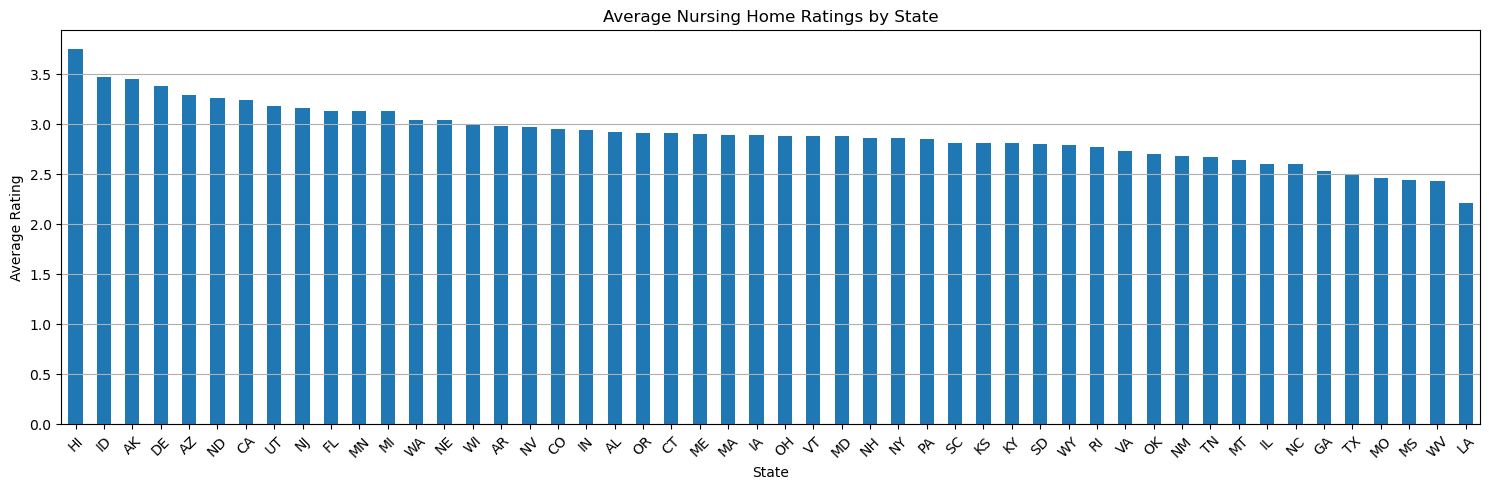

Bar chart successfully saved to Images\State_Ratings_Mean.png


In [146]:

# Define the path for saving the image
images_folder = Path("Images")
images_folder.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
save_path = images_folder / "State_Ratings_Mean.png"

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data on the axes object
state_ratings_mean.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Average Rating')
ax.set_title('Average Nursing Home Ratings by State')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the figure using the fig object directly
fig.savefig(save_path)

# Display the plot
plt.show()

print(f"Bar chart successfully saved to {save_path}")